# multiscale model fitting for Toy2c

Toy2c is a simplified version of toy2

### start with initalizing many things

In [1]:
# imports
import os
import sys
import torch
# import pickle
import numpy as np
import matplotlib.pyplot as plt
# from tqdm.notebook import tqdm
# import time
import math

module_path = os.path.abspath(os.path.join('../src/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
    
# import torch_cae_multilevel_V4 as net
import ResNet as tnet
import utils

reloaded
using new ResNet thing


In [2]:
# paths
data_dir = '../data/toy2c'
model_dir = '../model/toy2c'
result_dir = '../result/toy2c'

#load data
train_data = torch.tensor(np.load(os.path.join(data_dir, 'train_data.npy')))
val_data = torch.tensor(np.load(os.path.join(data_dir, 'val_data.npy')))
test_data = torch.tensor(np.load(os.path.join(data_dir, 'test_data.npy')))

data_of_sizes = {}
current_size = 1
unresolved_dict = {}
model_keep = list()
model_used_dict = {}


In [3]:

train_dict = utils.make_dict_all_sizes(train_data)
val_dict = utils.make_dict_all_sizes(val_data)

i =  0
Transforming
reshape to print
i =  1
Transforming
reshape to print
dict_keys(['4', '2', '1'])
i =  0
Transforming
reshape to print
i =  1
Transforming
reshape to print
dict_keys(['4', '2', '1'])


In [5]:
# import ResNet as tnet
current_size = 1
print(train_dict[str(current_size)].shape)
print(val_dict[str(current_size)].shape)
models, step_sizes, mse_list, idx_lowest,n_forward_list = utils.find_best_timestep(train_dict[str(current_size)], 
                                                              val_dict[str(current_size)], 
                                                              val_dict[str(current_size)], current_size,model_dir=model_dir,# make_new=True, #print_every=100, 
                                                             largest_k = 6, dont_train = False)

torch.Size([100, 500, 1, 1])
torch.Size([10, 500, 1, 1])
inside train_one_timestep
model loaded:  model_L1_D1_noise0.pt
epoch  0 : train_error:  7.5334024e-06 : val_loss  0.000119368124
epoch  100 : train_error:  6.531267e-06 : val_loss  6.540118e-06
epoch  200 : train_error:  5.950529e-06 : val_loss  5.9456606e-06
epoch  300 : train_error:  4.9551745e-06 : val_loss  4.9386e-06
epoch  400 : train_error:  2.6114735e-06 : val_loss  2.5943762e-06
epoch  500 : train_error:  1.0798123e-06 : val_loss  1.0716441e-06
epoch  600 : train_error:  4.5256212e-07 : val_loss  4.5044865e-07
epoch  700 : train_error:  3.072454e-07 : val_loss  3.0689827e-07
epoch  800 : train_error:  2.7029137e-07 : val_loss  2.7017958e-07
epoch  900 : train_error:  2.5503675e-07 : val_loss  2.5485e-07
inside train_one_timestep
model loaded:  model_L1_D2_noise0.pt
epoch  0 : train_error:  1.6437241e-05 : val_loss  0.00364241
epoch  100 : train_error:  1.6103731e-05 : val_loss  1.6070353e-05
epoch  200 : train_error:  1.

4
step_sizes =  [1, 2, 4, 8, 16, 32]
mse =  [0.08714801073074341, 0.1979338064789772, 0.026958235376514494, 0.03170133278472349, 0.07640985334292054, 0.17694708734052256]
y_preds[i] shape =  (122,)


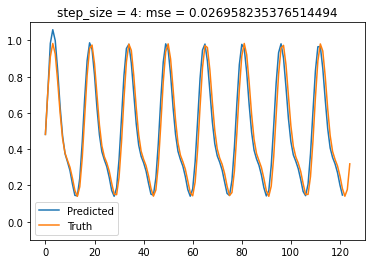

In [6]:
import ResNet as tnet

print(step_sizes[idx_lowest])    
print("step_sizes = ", step_sizes)
print("mse = ", mse_list)
utils.plot_lowest_error(models[idx_lowest], i =0, title="step_size = " +str(step_sizes[idx_lowest]))

# print(train_data.shape)
# dataset = tnet.DataSet(torch.flatten(train_data, 2,3), torch.flatten(val_data, 2,3), 
#                        torch.flatten(val_data, 2,3), 1, step_sizes[idx_lowest], 5)
# dataset.plot_val_data()

In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


reloaded
1 2
y_pred shape =  (10, 122)
truth_with_step_size[:,3:] shape =  torch.Size([10, 122, 2, 2])


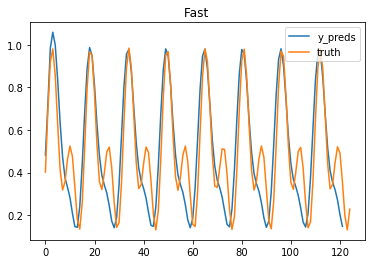

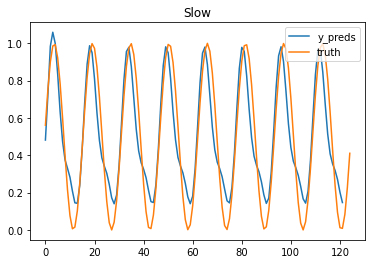

(2, 2)
[[0.04431546 0.04431546]
 [0.04102138 0.04102138]]


In [12]:
import utils

resolved, loss, unresolved_list = utils.find_error_4(val_dict['1'], models[idx_lowest], val_dict['2'], plot = True)
print(loss.shape)
print(loss)



In [13]:

unresolved_dict[str(current_size)] = torch.tensor(unresolved_list)

print(unresolved_list)

tensor([[1., 1.],
        [1., 1.]])


/tmp/ipykernel_310/3110518613.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  unresolved_dict[str(current_size)] = torch.tensor(unresolved_list)


torch.Size([100, 500, 2, 2])


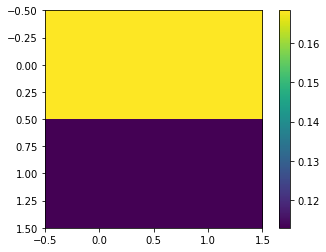

In [14]:
current_size = 1
next_train_data = unresolved_list * train_dict[str(current_size*2)]
print(next_train_data.shape)
plt.imshow(next_train_data[0,0])
plt.colorbar()
plt.show()

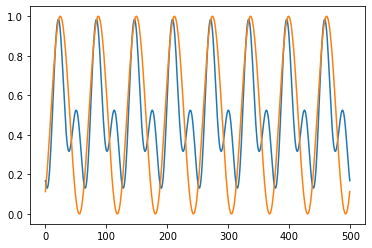

In [16]:
plt.plot(train_dict[str(current_size*2)][0,:,0,0])
plt.plot(train_dict[str(current_size*2)][0,:,1,0])

In [17]:
model_keep = [models[idx_lowest]]
model_used_dict[str(current_size)] = [[0]]

In [22]:
import utils




current_size = 2
next_train_data = unresolved_list * train_dict[str(current_size)]

model_idx_list = np.ones((current_size, current_size))*(-1) #start with all -1

for i in range(current_size):
    for j in range(current_size):
        print("i = ", i, ": j = ", j)
        data_this = next_train_data[:,:,i,j]
        if (torch.min(data_this) == 0) and (torch.max(data_this) == 0):
            print("zero, no need to train")
            #don't need to do anything is model is resolved
            continue
        else:
        #see if the error is low enough on already made model
            for m, model in enumerate(model_keep):
                loss, resolved = utils.find_error_1(data_this, model)
                step_size = model.step_size
                print("model ", m, " has loss = ", loss)
                if resolved:
                    model_idx_list[i,j] = m
                    print("Resolved with loss = ", loss, ": model #", m)
                    break
                else:
                    pass
            if not resolved:
                print("not resolved, fitting new model")
                k = int(np.log2(step_size))
                #if no model good, train new model
                models, step_sizes, mse_list, idx_lowest, n_forward_list = utils.find_best_timestep(train_dict[str(current_size)][:,:,i,j], 
                                                              val_dict[str(current_size)][:,:,i,j], 
                                                              val_dict[str(current_size)][:,:,i,j], current_size,model_dir=model_dir,#make_new = True,
                                                              i=i, j=j, start_k = max(0,k-1), largest_k = k+2, dont_train=False)
                
                model_keep.append(models[idx_lowest])
                model_idx_list[i,j] = len(model_keep)-1
model_used_dict[str(current_size)] = model_idx_list

i =  0 : j =  0
model  0  has loss =  0.07991931568831205
model  1  has loss =  0.07941808254690841
model  2  has loss =  0.0841791128506884
model  3  has loss =  0.09952415116131305
model  4  has loss =  0.07811482284450903
model  5  has loss =  0.08379834274528548
model  6  has loss =  0.09969304203987121
model  7  has loss =  0.10258014425635338
not resolved, fitting new model
inside train_one_timestep
model loaded:  model_L2_D4_noise0_i0_j0.pt
epoch  0 : train_error:  2.0587522e-05 : val_loss  0.0041282615
epoch  100 : train_error:  1.7791144e-05 : val_loss  1.7512884e-05
epoch  200 : train_error:  1.4208258e-05 : val_loss  1.4069852e-05
epoch  300 : train_error:  1.1858362e-05 : val_loss  1.1840333e-05
epoch  400 : train_error:  1.0320946e-05 : val_loss  1.0272191e-05
epoch  500 : train_error:  9.153228e-06 : val_loss  9.090926e-06
epoch  600 : train_error:  8.12472e-06 : val_loss  8.01506e-06
epoch  700 : train_error:  7.102879e-06 : val_loss  6.9471257e-06
epoch  800 : train_err

i =  1 : j =  1
model  0  has loss =  0.09611539114266635
model  1  has loss =  0.14935726299881935
model  2  has loss =  0.13800163045525551
model  3  has loss =  0.04287606400321238
model  4  has loss =  0.1602297842502594
model  5  has loss =  0.14437820687890052
model  6  has loss =  0.043265927355969326
model  7  has loss =  0.03578296832856722
model  8  has loss =  0.11556820496916771
model  9  has loss =  0.22320193648338318
model  10  has loss =  0.0016809569482575172
Resolved with loss =  0.0016809569482575172 : model # 10


In [23]:
print(model_idx_list)
print(len(model_keep))
print(model_used_dict)

[[ 8.  9.]
 [10. 10.]]
11
{'1': [[0]], '2': array([[ 8.,  9.],
       [10., 10.]])}


8.0
../model/toy2c/model_L2_D16_noise0_i0_j0.pt
1 2
y_pred shape =  (10, 29)
truth_with_step_size[:,3:] shape =  torch.Size([10, 29, 2, 2])


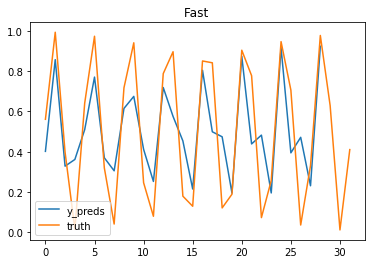

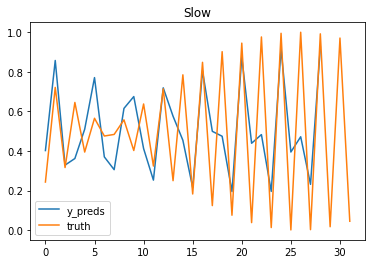

[[0.12331271 0.17653971]
 [0.12331271 0.17653971]]
tensor([[1., 1.],
        [1., 1.]])
9.0
../model/toy2c/model_L2_D32_noise0_i0_j1.pt
1 2
y_pred shape =  (10, 13)
truth_with_step_size[:,3:] shape =  torch.Size([10, 13, 2, 2])


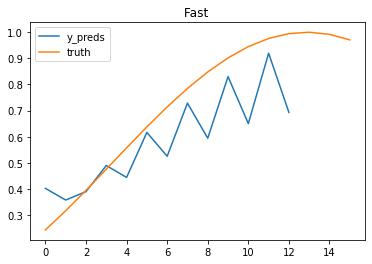

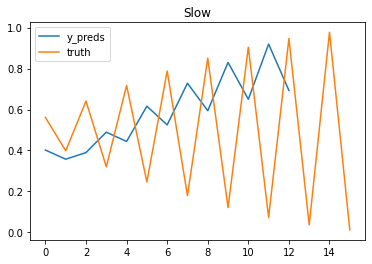

[[0.06877115 0.17782498]
 [0.06877115 0.17782498]]
tensor([[1., 1.],
        [1., 1.]])
10.0
../model/toy2c/model_L2_D64_noise0_i1_j0.pt
1 2
y_pred shape =  (10, 5)
truth_with_step_size[:,3:] shape =  torch.Size([10, 5, 2, 2])


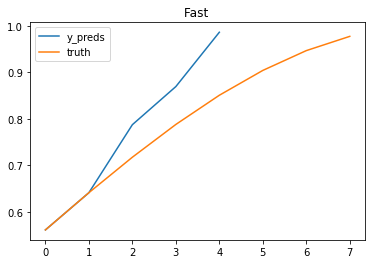

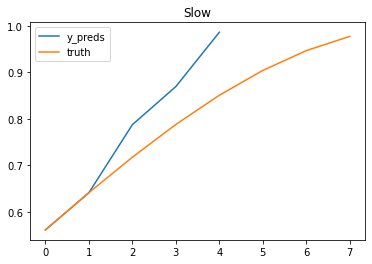

[[0.00331109 0.00331109]
 [0.00331109 0.00331109]]
tensor([[0., 0.],
        [0., 0.]])
10.0
../model/toy2c/model_L2_D64_noise0_i1_j0.pt
1 2
y_pred shape =  (10, 5)
truth_with_step_size[:,3:] shape =  torch.Size([10, 5, 2, 2])


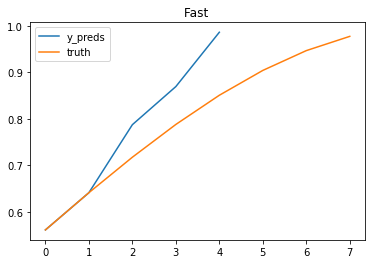

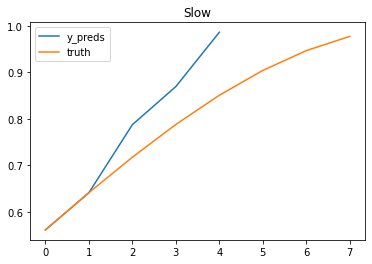

[[0.00331109 0.00331109]
 [0.00331109 0.00331109]]
tensor([[0., 0.],
        [0., 0.]])
all_resolved =  False
unresolved_list_big =  [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [24]:
import utils
#once we have all 4 figured out, need to check the errors on the 2x2 of the 2x2s (the 4x4)
unresolved_list_big = np.ones((4,4))*(-1)
all_resolved = True
for i in range(2):
    for j in range(2):
        print(model_used_dict['2'][i][j])
        model = model_keep[int(model_used_dict['2'][i][j])]
        print(model.model_name)
        data_next = val_dict['4'][:,:, i*current_size:(i+1)*current_size, j*current_size:(j+1)*current_size]
        resolved, loss, unresolved_list = utils.find_error_4(val_dict['2'][i,j], model, data_next,plot = True)
        unresolved_list_big[i*current_size:(i+1)*current_size, j*current_size:(j+1)*current_size] = unresolved_list
        if not resolved:
            all_resolved = False
        print(loss)
        print(unresolved_list)
print("all_resolved = ", all_resolved)
print("unresolved_list_big = ", unresolved_list_big)

In [19]:
print(step_sizes, mse_list, idx_lowest)
resolved, loss, unresolved_list = utils.find_error_4(val_dict[str(current_size)][:,:,i,j], 
                                                               models[idx_lowest], 
                                                               val_dict[str(current_size*2)][:,:, i*current_size:(i+1)*current_size, j*current_size:(j+1)*current_size])
print(loss)    

[2, 4, 8] [0.03056175254750997, 0.021919134788186058, 0.021293074826826342] 2
1 2
[[0.02129307 0.02129307]
 [0.02129307 0.02129307]]


In [20]:
model =  models[idx_lowest]
print(idx_lowest)
n_timesteps = 500
n_points = 10
dim = 1
# plt.plot(model(val_dict[str(current_size)][:,:,i,j].unsqueeze(2).unsqueeze(3))[0,:,0,0].detach().numpy(), label = "predicted")
print(val_dict[str(current_size)][:,0,i,j].unsqueeze(1).shape)
val_data_this = val_dict[str(current_size)][:,0,i,j].unsqueeze(1)
predicted = model.uni_scale_forecast(val_data_this, n_steps=n_timesteps-1)
print(predicted.shape)
predicted_reshape = predicted.reshape((  n_points, n_timesteps-1, dim,dim))
plt.plot(predicted_reshape[0,:,0], label = "predicted")
print(val_dict[str(current_size*2)][:,:, i*current_size:(i+1)*current_size, i*current_size:(i+1)*current_size].shape)
# plt.plot(val_dict[str(current_size*2)][:,1:, i*current_size:(i+1)*current_size, i*current_size:(i+1)*current_size][0,:,0,0], label = "Truth")

plt.plot(val_dict[str(current_size*2)][:,1:, i*current_size:(i+1)*current_size, i*current_size:(i+1)*current_size][0,:,0,1], label = "Truth")
plt.legend()

2
torch.Size([10, 1])
x_init shape =  torch.Size([10, 1])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x1 and 3x20)

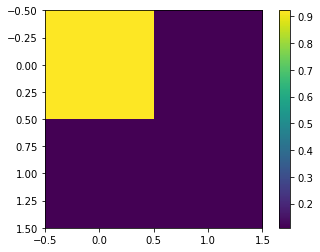

In [32]:
plt.imshow(val_dict[str(current_size*2)][0,0])
plt.colorbar()

In [ ]:
step_size = (16+32)/2
print(step_size)
model = train_one_timestep(int(28), train_dict[str(current_size)][:,:,i,j].unsqueeze(2), 
                           val_dict[str(current_size)][:,:,i,j].unsqueeze(2), 
                           val_dict[str(current_size)][:,:,i,j].unsqueeze(2), current_size)
#                        dt = 1, n_forward = 5, noise=0, make_new = False, dont_train = True, 
#                        lr = 1e-3, max_epochs = 10000, batch_size = 50,threshold = 1e-4, 
#                        model_dir = './models/toy2',i=None, j = None):
    
#     train_dict[str(current_size)][:,:,i,j], 
#                                                               val_dict[str(current_size)][:,:,i,j], 
#                                                               val_dict[str(current_size)][:,:,i,j], current_size,model_dir=model_dir, 
#                                                               i=i, j=j, start_k = max(0,k-1), largest_k = k+2)

In [ ]:
i = 0
j = 1
resolved, loss, unresolved_list = find_error_4(val_dict[str(current_size)][:,:,i,j], 
                                                               model, 
                                                               val_dict[str(current_size*2)][:,:, i*current_size:(i+1)*current_size, j*current_size:(j+1)*current_size])
print(loss)

In [ ]:
# model =  models[idx_lowest]
print(idx_lowest)
n_timesteps = 500
n_points = 10
dim = 1
# plt.plot(model(val_dict[str(current_size)][:,:,i,j].unsqueeze(2).unsqueeze(3))[0,:,0,0].detach().numpy(), label = "predicted")
print(val_dict[str(current_size)][:,0,i,j].unsqueeze(1).shape)
val_data_this = val_dict[str(current_size)][:,0,i,j].unsqueeze(1)
predicted = model.uni_scale_forecast(val_data_this, n_steps=n_timesteps-1)
print(predicted.shape)
predicted_reshape = predicted.reshape((  n_points, n_timesteps-1, dim,dim))
plt.plot(predicted_reshape[0,:,0], label = "predicted")
print(val_dict[str(current_size*2)][:,:, i*current_size:(i+1)*current_size, i*current_size:(i+1)*current_size].shape)
# plt.plot(val_dict[str(current_size*2)][:,1:, i*current_size:(i+1)*current_size, i*current_size:(i+1)*current_size][0,:,0,0], label = "Truth")

plt.plot(val_dict[str(current_size*2)][:,1:, i*current_size:(i+1)*current_size, i*current_size:(i+1)*current_size][0,:,0,1], label = "Truth")
plt.legend()